<a href="https://colab.research.google.com/github/shiissaa/MAT422/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4.2 Spectral Graph Bipartitioning**

Graph partition aims to find out a partition such that the cut (the total
number of edges between two disjoint sets of nodes) is minimized. For a
weighted graph G = (V, E) , given a bipartition of V into disjoint V1 and V2
(V1 ∪V2 = V ), the cut between them can be defined as

cut(V1,V2) = ∑ i∈V1, j∈V2 M_ij.

The classical graph bipartitioning problem is to find nearly equally-sized vertex subset Vi, V2 of V such that

cut(V1* ,V2* ) = minV1,V2 cut (V1,V2).




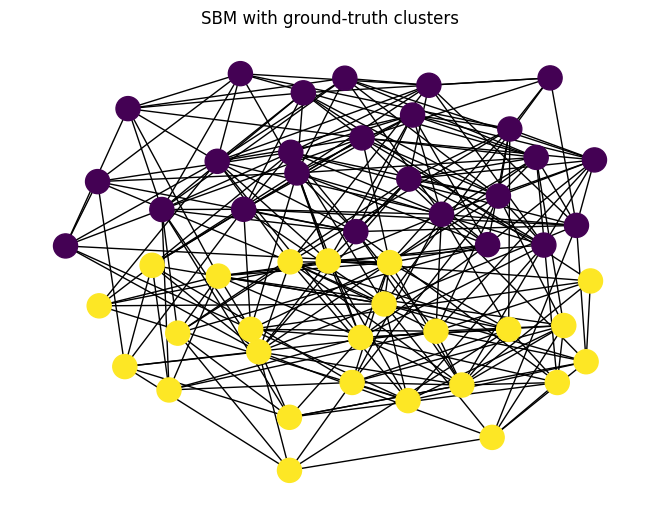

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla

ns = [25, 25] # size of clusters
ps = [[0.3, 0.1], [0.1, 0.3]] # probability of edge
G = nx.stochastic_block_model(ns, ps)
true_clusters = [c for _, c in nx.get_node_attributes(G, 'block').items()]


nx.draw_kamada_kawai(G, with_labels=False, node_color=true_clusters)
plt.title("SBM with ground-truth clusters")
plt.show()


<ipython-input-6-dc5c20920595>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lam, V = sla.eigsh(nx.laplacian_matrix(G).astype(np.float), which='SM')


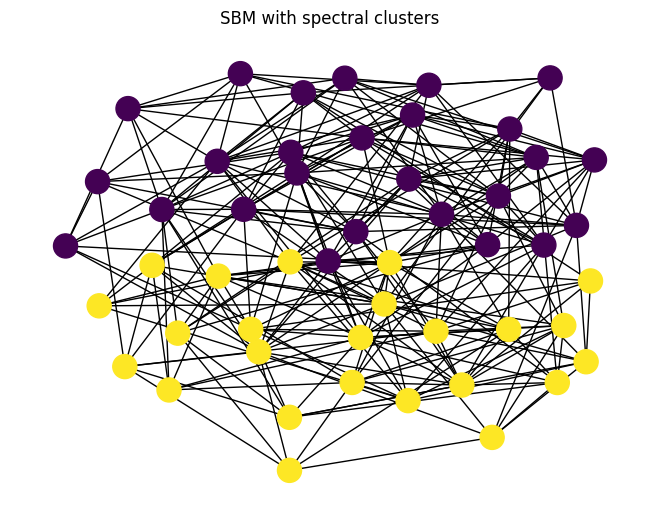

In [6]:
lam, V = sla.eigsh(nx.laplacian_matrix(G).astype(np.float), which='SM')
x = V[:,1]
cs = x < 0 # get clusters

nx.draw_kamada_kawai(G, with_labels=False, node_color=cs)
plt.title("SBM with spectral clusters")
plt.show()


In [7]:
from sklearn import metrics

metrics.adjusted_rand_score(true_clusters, cs)


0.9199693343555215

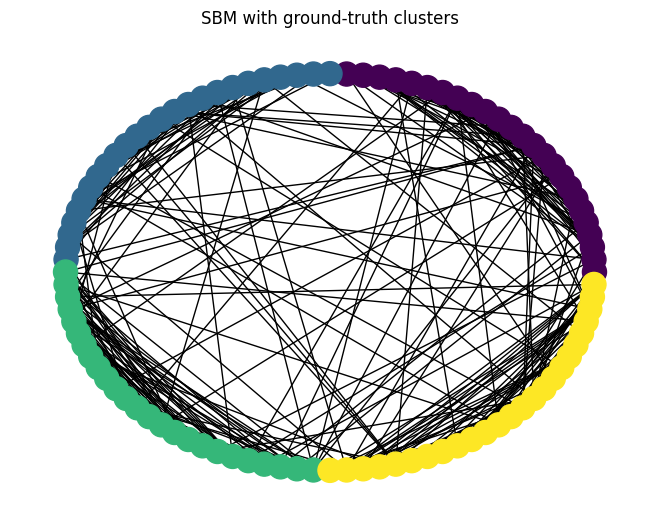

In [8]:
nclusters = 4
ns = [25 for i in range(nclusters)] # size of clusters
ps = 0.02 * np.ones((nclusters, nclusters)) + 0.25 * np.eye(nclusters)
G = nx.stochastic_block_model(ns, ps)
true_clusters = [c for _, c in nx.get_node_attributes(G, 'block').items()]

nx.draw_circular(G, with_labels=False, node_color=true_clusters)
plt.title("SBM with ground-truth clusters")
plt.show()


<ipython-input-9-455d0371bbf8>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lam, V = sla.eigsh(nx.laplacian_matrix(G).astype(np.float), k=nclusters+1, which='SM')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


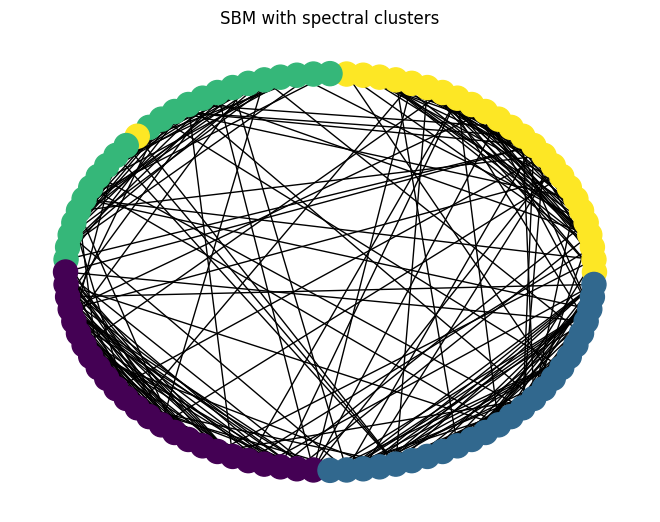

In [9]:
from sklearn.cluster import KMeans

lam, V = sla.eigsh(nx.laplacian_matrix(G).astype(np.float), k=nclusters+1, which='SM')
X = V[:,1:]
cs = KMeans(n_clusters=nclusters).fit_predict(X) # get clusters

nx.draw_circular(G, with_labels=False, node_color=cs)
plt.title("SBM with spectral clusters")
plt.show()


In [10]:
metrics.adjusted_rand_score(true_clusters, cs)


0.97305763367046